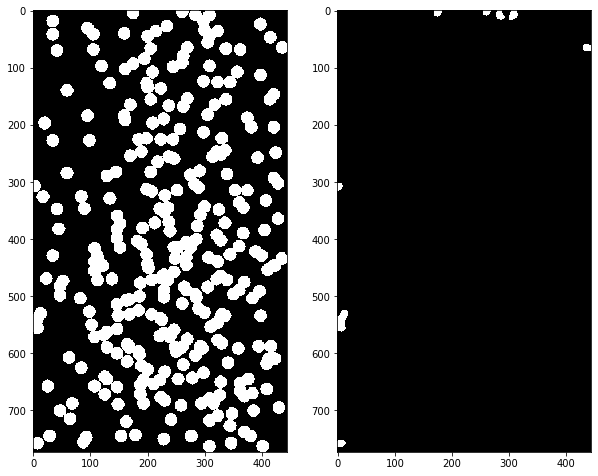

In [3]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 
import sys
sys.setrecursionlimit(100000)
    
def dfs(i,j,marked):
    if (i<0 or i>=h or j<0 or j>=w or marked[i,j]==1):
        return 0
    
    marked[i,j]=1
    if eroded[i,j]==1:
        boundary[i,j] = 1    
        dfs(i-1,j,marked)
        dfs(i,j-1,marked)
        dfs(i+1,j,marked)
        dfs(i,j+1,marked)
    return 0
    
    
coin = cv2.imread('../input/coins.jpg',0)
h=coin.shape[0]
w=coin.shape[1]

coin = (coin>127)
coin = coin.astype(np.uint8)
bound_coins = np.zeros((h,w))
boundary = np.zeros((h,w))
bound_coins[0,:]=1
bound_coins[:,0]=1
bound_coins[h-1,:]=1
bound_coins[:,w-1]=1
list1 = [0,h-1]
list2 = [0,w-1]



elem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8,8))
eroded = cv2.erode(coin,elem,iterations=2)
marked = np.zeros((h,w))
anded = np.logical_and(eroded,bound_coins)
anded = anded.astype(np.uint8)

for i in range(h):
    for j in range(w):
        if anded[i,j]==1 and marked[i,j]==0:
            dfs(i,j,marked)
dilated = cv2.dilate(boundary,elem,iterations=1)
            
# for i in list1:
#     for j in range(0,w):
#         if eroded[i,j]==1:
#             bound_coins[i,j] = 1
#             dfs(i,j,marked)
        
# for i in range(0,h):
#     for j in list2:
#         if coin[i,j]==1:
#             bound_coins[i,j] = 1
#             dfs(i,j,marked)
            
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(coin,'gray')
plt.subplot(1,2,2)
plt.imshow(dilated,'gray')

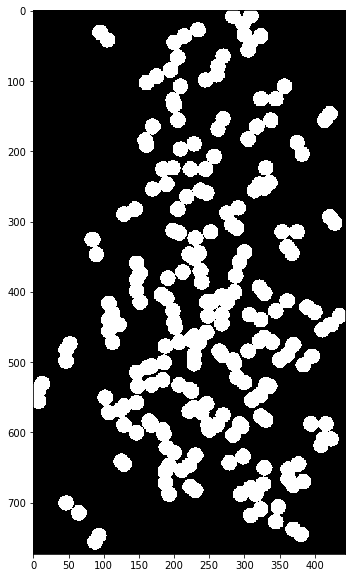

In [54]:
#overlapping coins 
def dfs_(i,j,nonover_):
    if (i<0 or i>=h or j<0 or j>=w or nonover_[i,j]==1):
        return 0
    nonover_[i,j]=1
#     marked[i,j]=1
    if coin[i,j]==1:
        nonover[i,j]=1
        dfs_(i-1,j,nonover_)
        dfs_(i,j-1,nonover_)
        dfs_(i+1,j,nonover_)
        dfs_(i,j+1,nonover_)
    return 0


def fourconn(i,j):
    if (i<0 or i>=h or j <0 or j>=w or marked_[i,j]==1):
        return 0
    marked_[i,j]=1
    global no_of_pixels
    no_of_pixels += 1
    if coin[i,j]==1:  
        fourconn(i-1,j)
        fourconn(i,j-1)
        fourconn(i,j+1)
        fourconn(i+1,j)    
    return no_of_pixels

marked_ = np.zeros((h,w))
overlap_indices = []
nonoverlap_indices = []
nonover_ = np.zeros((h,w))
nonover = np.zeros((h,w))

for i in range(h):
    for j in range(w):
        global no_of_pixels
        no_of_pixels = 0
        if marked_[i,j]==0 and coin[i,j]==1:
            fourconn(i,j)
#             print(no_of_pixels)
            if no_of_pixels > 480:
#                 print('kk')
                nonoverlap_indices.append([i,j])

for i in nonoverlap_indices:
    if nonover_[i[0],i[1]]==0 and coin[i[0],i[1]]==1:
#         nonover[i[0],i[1]]=1
        dfs_(i[0],i[1],nonover_)
                
plt.figure(figsize=(10,10))
plt.imshow(nonover,'gray')




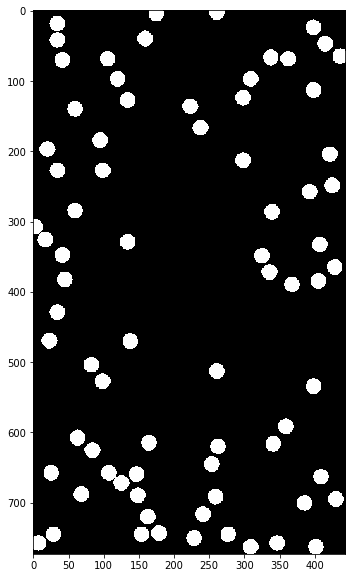

In [53]:
#nonoverlapping coins 

overlap = coin - nonover
plt.figure(figsize=(10,10))
plt.imshow(overlap,'gray')
